<xarray.DataArray 'heightAboveSea' (heightAboveSea: 46)>
array([   30.,   304.,   609.,   914.,  1219.,  1524.,  1828.,  2133.,  2438.,
        2743.,  3048.,  3352.,  3657.,  3962.,  4267.,  4572.,  4876.,  5181.,
        5486.,  5791.,  6096.,  6400.,  6705.,  7010.,  7315.,  7620.,  7924.,
        8229.,  8534.,  8839.,  9144.,  9448.,  9753., 10058., 10363., 10668.,
       10972., 11277., 11582., 11887., 12192., 12496., 12801., 13106., 13411.,
       13716.])
Coordinates:
    time            datetime64[ns] ...
  * heightAboveSea  (heightAboveSea) float64 30.0 304.0 ... 1.341e+04 1.372e+04
Attributes:
    long_name:  original GRIB coordinate for key: level(heightAboveSea)
    units:      1


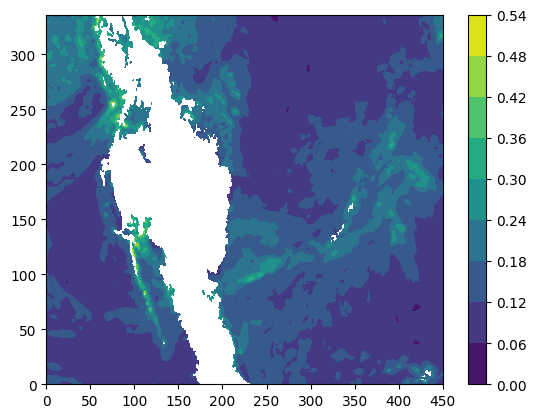

In [5]:
import os

os.environ["ECCODES_HOME"] = "/Users/gmecocci/Downloads/grib/eccodes"

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


# for i in range(1, 2):
#     print(f"processing {i}")
#     try:
import cfgrib


ds = xr.open_dataset(f"/Users/gmecocci/projects/turbol/grib/data/sn.0000.bin", engine='cfgrib', backend_kwargs={'filter_by_keys': {'shortName': 'cat'}})
print(ds.heightAboveSea)

# for altitude in np.arange(30, 30, 0.1): #np.arange(30, 50, 0.1):
# print(f"For alt: {altitude}")
dds = ds.sel(step=np.timedelta64(1, 'h'), method="nearest").sel(heightAboveSea=914.0, method="nearest")
plt.contourf(dds.cat)
plt.colorbar()